# **Project 6: MPG dataset**
# *Data Analytics Fundamentals*

### Carlos Montoya III

#### February 16, 2024

#### **Objective**
Perform and publish a custom EDA project to demnostrate skills with Jupyter, pandas, Seaborn and popular tools for data analytics. The notebook should tell a data story and visually present findings in a clear and engaging manner.

### **Import Libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### **Data Acquisition & Inspection**

This will show the first 10 rows of the data and how it's structured. There are 398 rows & 9 columns. 
Numerical columns: mpg, cylinders, displacement, horsepower, weight, acceleration, model_year.
Categorical columns: origin & name.

In [2]:
# Load the mpg dataset into a pandas DataFrame
df = sns.load_dataset('mpg')

# Inspect first rows of the DataFrame
print(df.head(10))
print(df.shape)
print(df.dtypes)

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   
5  15.0          8         429.0       198.0    4341          10.0   
6  14.0          8         454.0       220.0    4354           9.0   
7  14.0          8         440.0       215.0    4312           8.5   
8  14.0          8         455.0       225.0    4425          10.0   
9  15.0          8         390.0       190.0    3850           8.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa         

### **Initial Descriptive Statistics**

This shows the descriptive statistics of the data

In [3]:
print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


### **Initial Data Distribution for Numerical Columns**

This shows all the numerical columns as a histogram. The mpg histogram is displayed larger to see.

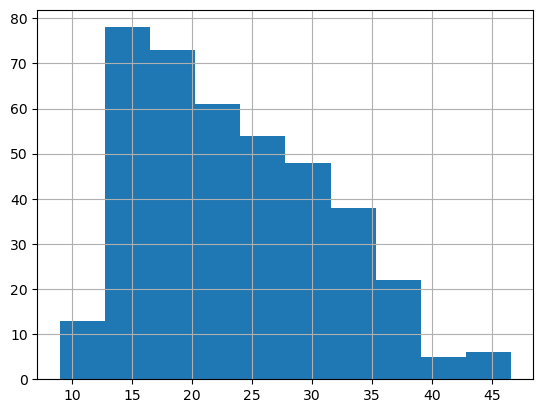

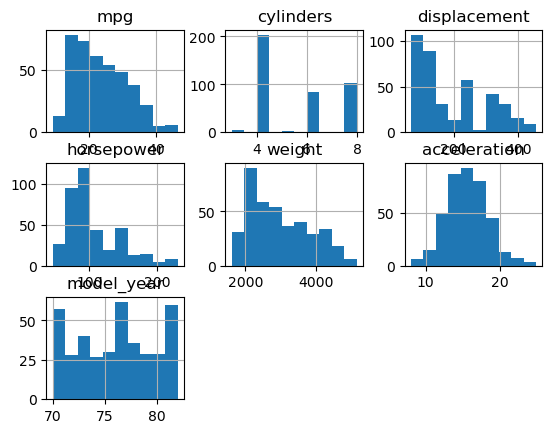

In [4]:
# Inspect histogram by numerical column
df['mpg'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

### Document Observations:

- The acceleration graph looks the most normally distributed
- Most of the mpg falls between 15 and 20 mpg
- 4 cylinder is the most common cylinder type
- Most of horsepower is near 100

### **Initial Data Distribution for Categorical Columns**

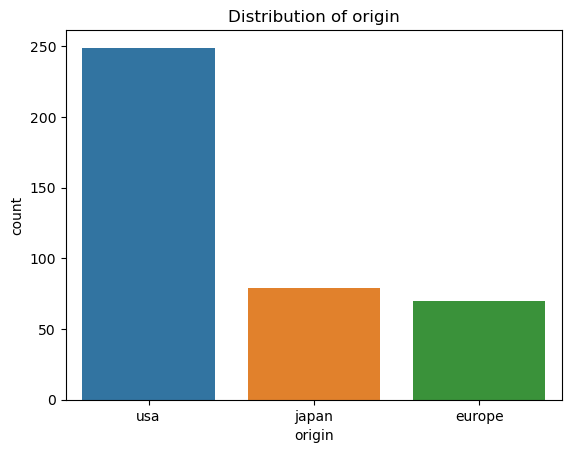

In [5]:
# Inspect value counts by categorical column
df['origin'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    if col == 'origin':  # Check if the column is 'origin'
        # Display count plot
        sns.countplot(x='origin', data=df)
        plt.title('Distribution of origin')
        plt.show()

# Show all plots
plt.show()

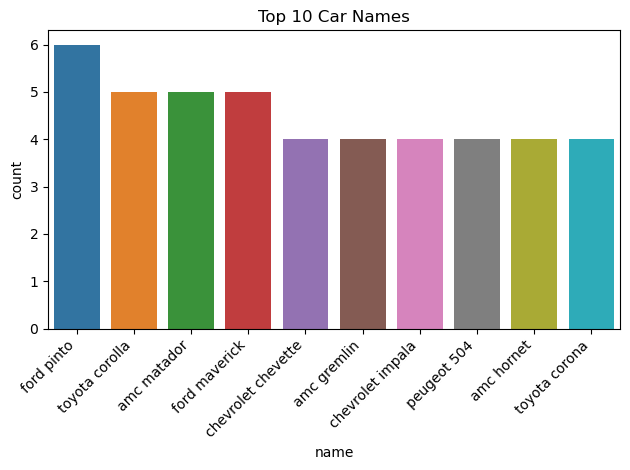

In [6]:
name_counts = df['name'].value_counts()

# Set the number of top 10 names to display
top_n = 10

# Get the top N names
top_names = name_counts.head(top_n)

# Create a DataFrame with 'name' and 'count' columns for the top N names
top_names_df = pd.DataFrame({'name': top_names.index, 'count': top_names.values})

# Plot the count plot for the top N names
sns.barplot(x='name', y='count', data=top_names_df)
plt.title(f'Top {top_n} Car Names')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Document Observations:

- There are 250 cars that originate from USA from this dataset (the most)
- Japan and Europe have near the same amount of cars that originate from them
- The most common car name here is the Ford Pinto (6)

### **Initial Data Transformation and Feature Engineering**

Rename columns to look cleaner. Add more columns for more data.

In [7]:
# Renaming a column
df.rename(columns={'mpg': 'MPG'}, inplace=True)
df.rename(columns={'cylinders': 'Cylinders'}, inplace=True)
df.rename(columns={'displacement': 'Engine Displacement'}, inplace=True)
df.rename(columns={'horsepower': 'Horsepower'}, inplace=True)
df.rename(columns={'weight': 'Weight'}, inplace=True)
df.rename(columns={'acceleration': 'Acceleration'}, inplace=True)
df.rename(columns={'model_year': 'Model Year'}, inplace=True)
df.rename(columns={'origin': 'Origin'}, inplace=True)
df.rename(columns={'name': 'Name'}, inplace=True)

# Adding a new column
df['Fuel Efficiency'] = df['MPG'] / df['Horsepower']
df['Power to Weight Ratio'] = df['Horsepower'] / df['Weight']

### **Initial Visualizations**

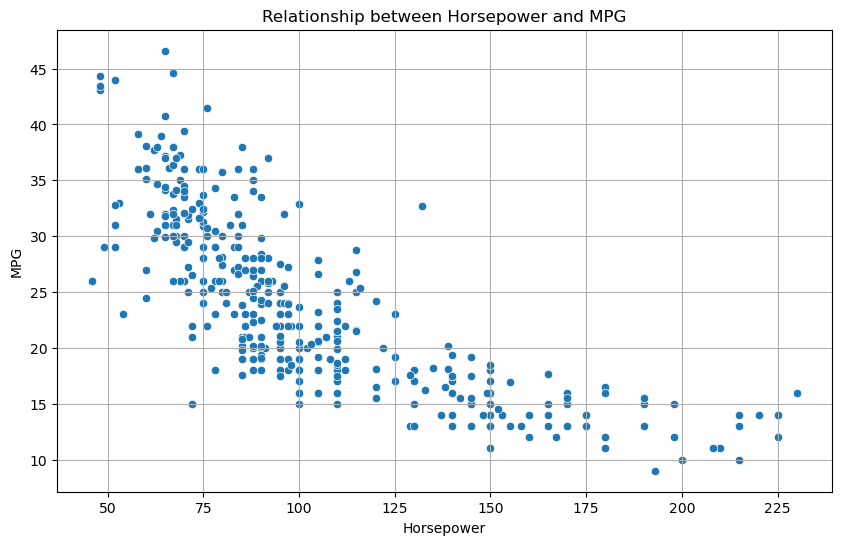

In [8]:
# Plotting the relationship between horsepower and MPG
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Horsepower', y='MPG', data=df)
plt.title('Relationship between Horsepower and MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

### Document Observations:
- As Horsepower increases, MPG decreases. Meaning vehicles with more horsepower, have less fuel efficiency.
- There are some outliers where the Horsepower, doesn't necessarily have the lowest MPG.
- Knowing this might help with deciding what vehicle to purchase.
- There is a wide spread of data

### Document Observations:


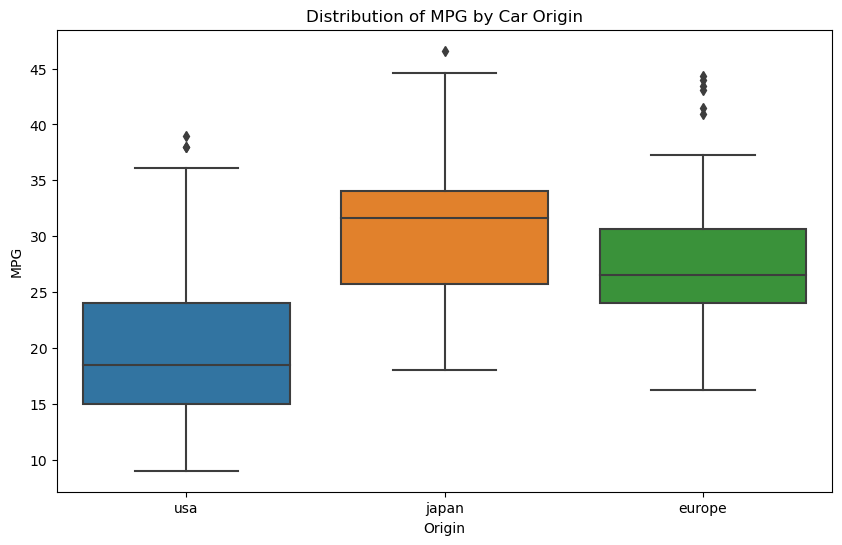

In [9]:
# Plotting the distribution of MPG by origin using a violin plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Origin', y='MPG', data=df)
plt.title('Distribution of MPG by Car Origin')
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.show()

### Document Observations:
- This chart shows the comparison of MPG to Origin
- Japan cars have a higher median MPG values compared to USA & Europe cars. Better fuel efficiency for Japan-made vehicles on average
- Europe cars show less variability in MPG compared to USA and Japan cars
- Japan has the highest outlier (most fuel efficient vehicle)
- USA has the lowest outlier (least fuel efficient vehicle)

/Users/carlosmontoya3/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

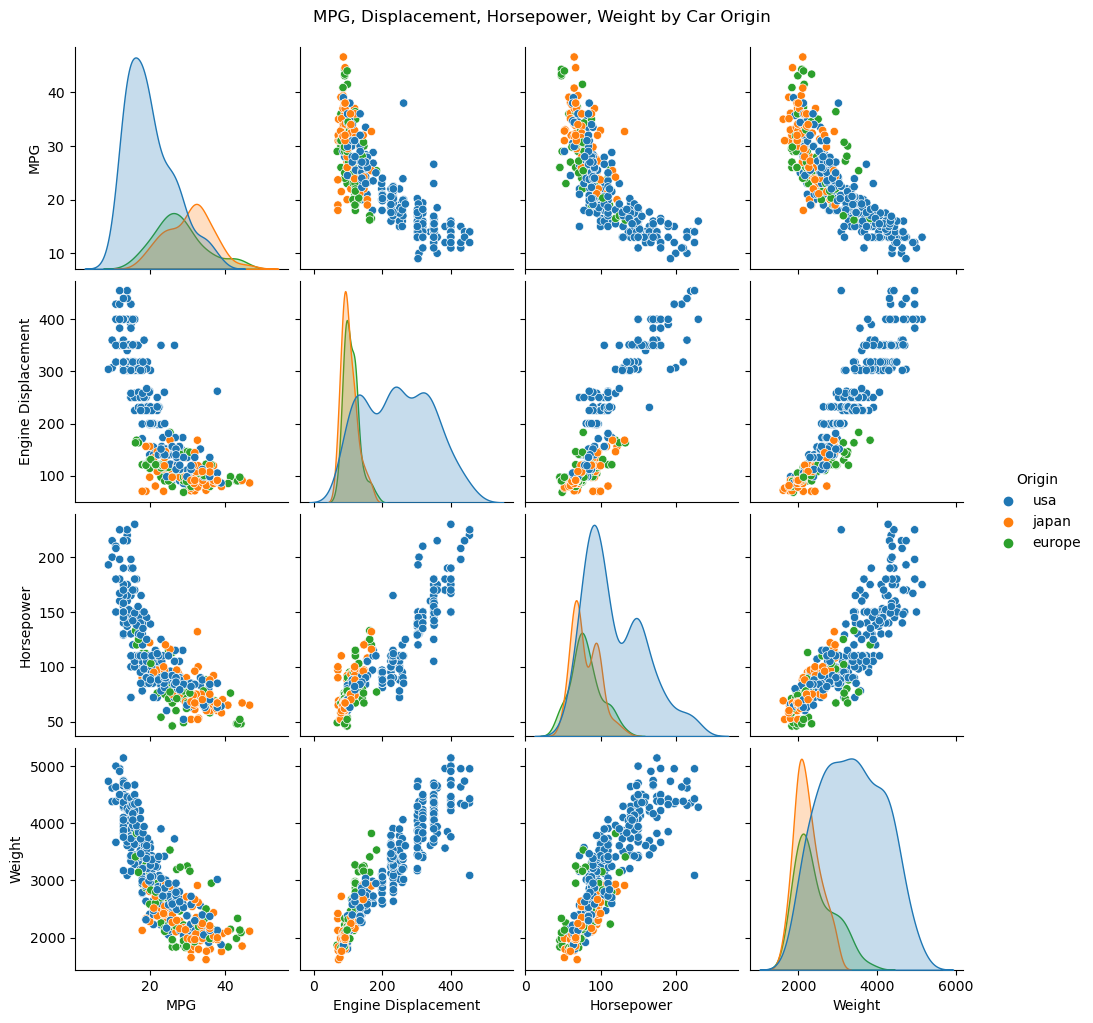

In [10]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='Origin', vars=['MPG', 'Engine Displacement', 'Horsepower', 'Weight'], diag_kind='kde')
plt.suptitle('MPG, Displacement, Horsepower, Weight by Car Origin', y=1.02)
plt.show()

### Document Observations:
- There are relationships across all categories
- There is negative correlation when comparing MPG to Engine Displacement, Horsepower, and Weight
- There is a positive correlation when comparing Engine Displacement, Horsepower, and Weight to each other.
- The USA looks normal distributed for the Weight chart

/Users/carlosmontoya3/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

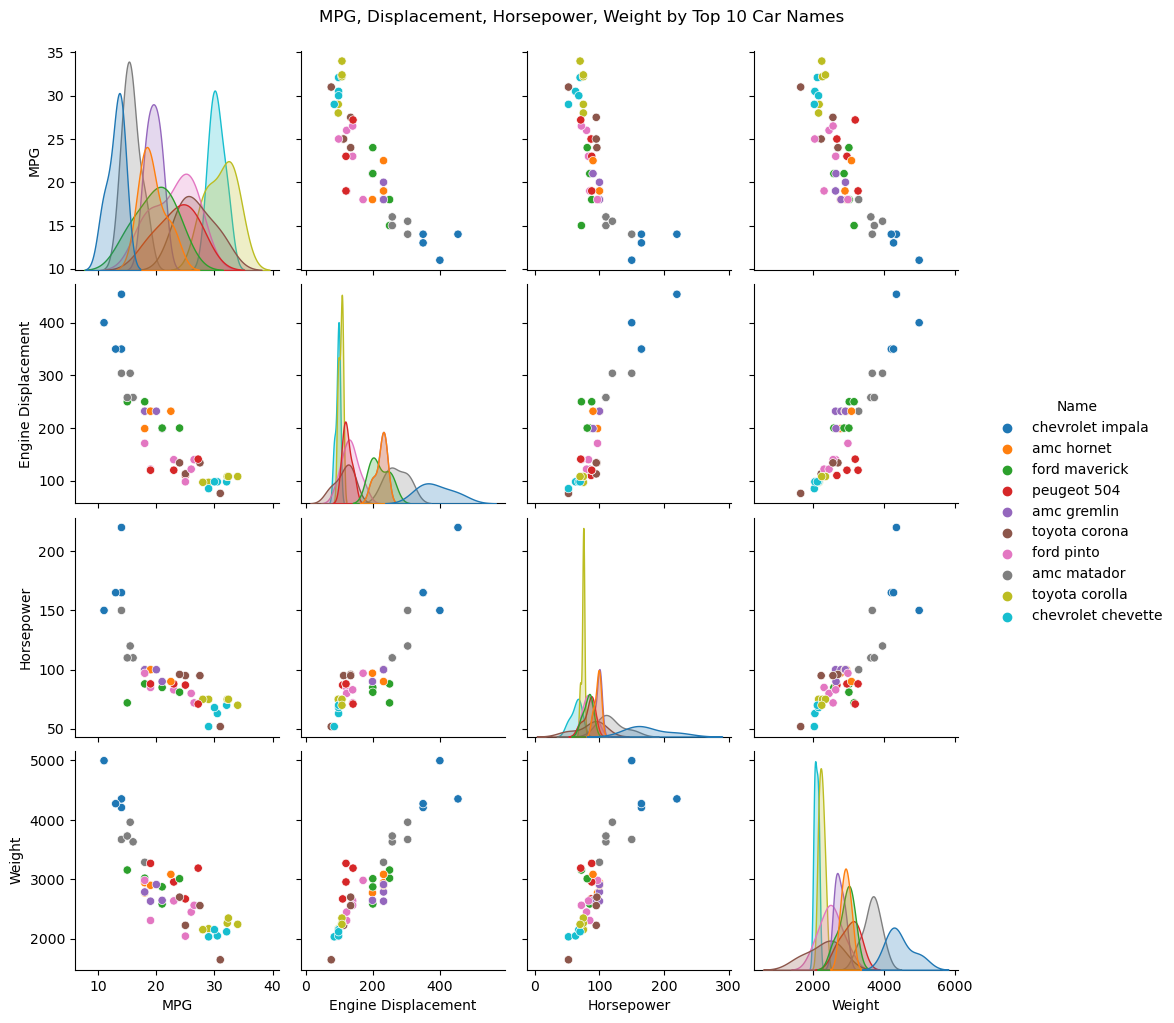

In [11]:
# Get the top 10 most frequent car names
top_10_names = df['Name'].value_counts().head(10).index.tolist()

# Filter the dataframe to include only data for the top 10 car names
df_top_10_names = df[df['Name'].isin(top_10_names)]

# Plot a pairplot for the top 10 car names
plt.figure(figsize=(10, 8))
sns.pairplot(df_top_10_names, hue='Name', vars=['MPG', 'Engine Displacement', 'Horsepower', 'Weight'], diag_kind='kde')
plt.suptitle('MPG, Displacement, Horsepower, Weight by Top 10 Car Names', y=1.02)
plt.show()

### Document Observations:
- Looks like the same trends follow as the chart above
- MPG to the other categories have a negative correlation
- Engine Displacement, Horsepower, and Weight have a postive correlation to each other
- The Toyota Corolla has the highest MPG
- The Chevrolet Impala has the lower MPG
- The Chevrolet Impala has the highest Engine Displacement, Horsepower, and Weight

### **Conclusion:**

The analysis of the 'mpg' dataset has provided valuable insights into several aspects of car performance and characteristics.

MPG varies across different car models and origins. 
Japan cars tend to have a higher median MPG values compared to USA and Europe cars. Which suggests better fuel efficiency for Japan-made vehicles on average.

Engine displacement, horsepower, and vehicle weight impact fuel efficiency.
Generally, smaller engine displacements, lower horsepower, and lighter vehicles are associated with higher MPG. Bigger engine displacements, higher horsepower, and heavier vehicles tend to have lower MPG.

Cars from different origins (USA, Europe, and Japan) have distinct characteristics in terms of fuel efficiency and engine specifications.
Understanding these regional differences is essential for consumers when making decisions about vehicle purchases. They vary depending on market trends and environments.

The top 10 most frequent car names had varied relationships between MPG, engine displacement, horsepower, and vehicle weight. There were unique features for each model.

In conclusion, the analysis of the 'mpg' dataset gives valuable insights into the nature of car performance and characteristics. By looking at the relationships between fuel efficiency, engine specifications, and car origin, this analysis helps to have a deeper understanding of the factors influencing vehicle performance and informs decision-making processes for consumers.